### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1

What is the median travel time for different type of users (i.e. Customer or Sbscriber) in Washington city?

wash$User.Type: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     NA      NA      NA     NaN      NA      NA       1 
------------------------------------------------------------ 
wash$User.Type: Customer
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.3    930.9   1505.1   2634.4   2734.3 904591.4 
------------------------------------------------------------ 
wash$User.Type: Subscriber
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    60.27    354.55    569.69    733.33    901.17 170032.91 

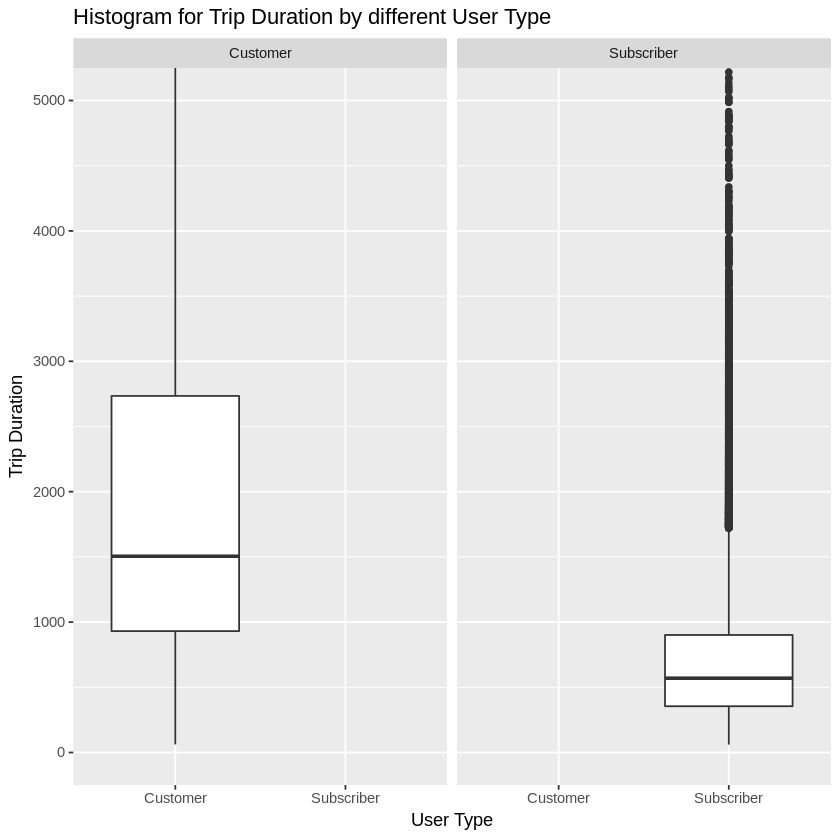

In [40]:
# Reading data of Washington city
wash = read.csv('washington.csv')

#Loading the library of ggplot2 package 
library('ggplot2')

#Summary of 'Trip Duration' by 'User Type' to find the median travel time for Customers and Subscribers
by(wash$Trip.Duration, wash$User.Type, summary)

#Box Plot of 'Trip Duration' by 'User Type' so as to find the median travel time for users as indicated by the line inside box
qplot(x=User.Type, y=Trip.Duration, data=na.omit(wash), geom ='boxplot',
    xlab ='User Type', ylab ='Trip Duration', main ='Histogram for Trip Duration by different User Type') +
    coord_cartesian (ylim= c(0,5000)) +
facet_wrap(~User.Type)

#Please note that the omit function here will not affect the results as the other variables doesn't have NA values in Washington

Median travel time for Customers = 1505.1 seconds; Median travel time for Subscribers = 569.59 seconds. 
The data shows that the median travel time of Customers is much higher than the Subscibers. This quite significant difference between the two User Types, gives a great opportunity to have different pricing schemes based on User Types.

### Question 2

Which is the most common Start Station in Chicago?

Streeter Dr & Grand Ave    Lake Shore Dr & Monroe St 
                         210                          140 
Clinton St & Washington Blvd 
                         120

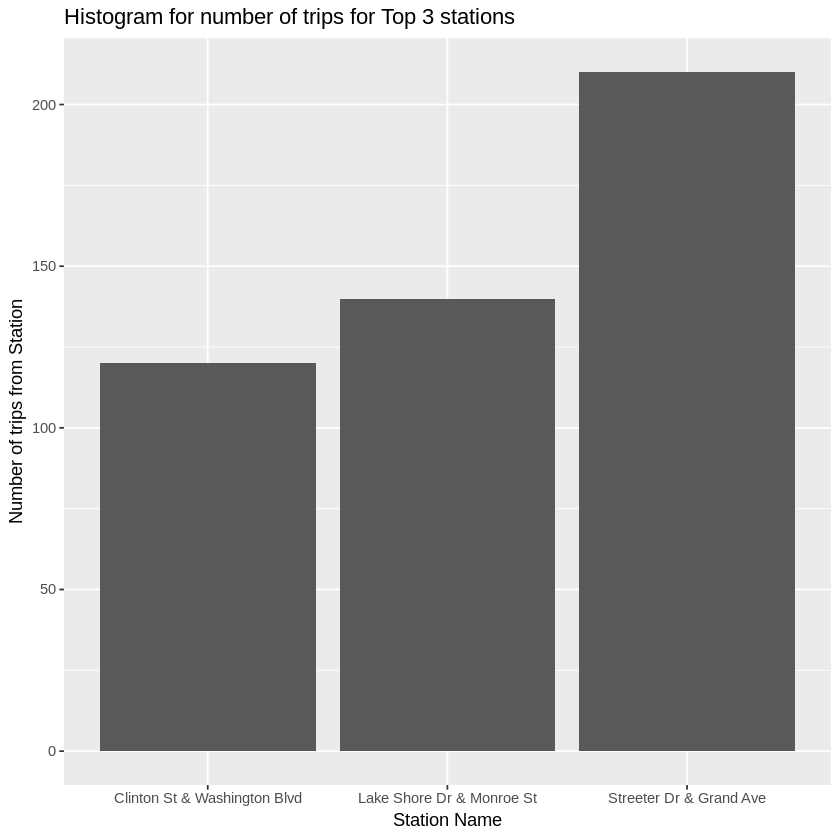

In [46]:
# Reading data of Chicago city
chi = read.csv('chicago.csv')

#Loading the library of ggplot2 package 
library('ggplot2')

#Creating a variable based on summary of 'Start.Station' column to hold Top 3 stations in terms of no. of trips
Top.3.stations = head (summary(chi$Start.Station) , 3)
Top.3.stations

#Plotting a Histogram to reflect Number of trips each from Top 3 Stations 
qplot(x=Start.Station, 
     data = subset (chi, Start.Station == 'Streeter Dr & Grand Ave' | Start.Station == 'Lake Shore Dr & Monroe St' | 
     Start.Station == 'Clinton St & Washington Blvd'),
     xlab ='Station Name', ylab ='Number of trips from Station', main ='Histogram for number of trips for Top 3 stations') 

'Streeter Dr & Grand Ave' is the most common Start station in Chicago.  
The result shows that 210 trips have originated from this station. High number of trips indicate high footfall and hence this station is a great place for advertisements.

### Question 3

What are the counts of genderwise trips in NewYork city?

Female   Male 
  5410  12159  37201

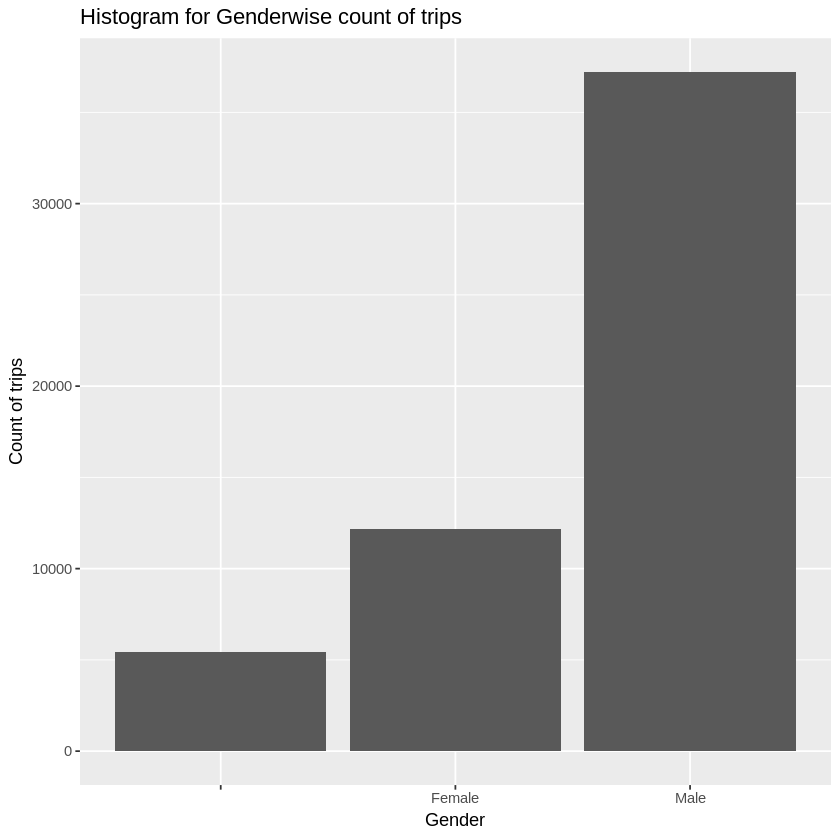

In [45]:
# Reading data of New York city
ny = read.csv('new_york_city.csv')

#Loading the library of ggplot2 package ('ggplot2' package hasn't been separately installed as it is embedded in this notebook)
library('ggplot2')

#Summary of 'Gender' to show no. of trips (as denoted by no. of rows) for each gender
summary (ny$Gender)

#Plotting a Histogram showing Genderwise usage of Bikeshare in NewYork city
qplot(x=Gender, data=ny,
    xlab ='Gender', ylab ='Count of trips', main ='Histogram for Genderwise count of trips') 

Trips made by females = 12159; Trips made by males = 37201;  
It can be seen that the trips made by Females is not even one-third of the trips made by Males. This shows that the usage of Bike rental among females is yet to pick up and hence a strategy can be devised to target more females for using Bike rental.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')